<div class="alert alert-info">
    <h2>Imports</h2>
    </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import NMF
from collections import Counter

%matplotlib inline 

<div class="alert alert-info">
    <h2>Data exploration</h2>
    </div>

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [3]:
df.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [4]:
df.columns

Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 'feat_82', 'fe

In [5]:
if("id" in df.columns and "target" in df.columns):
    
    ids = df.id
    target = df.target
    num_target = df["target"].astype('category').cat.codes
    df.drop(["id","target"],axis=1,inplace=True)

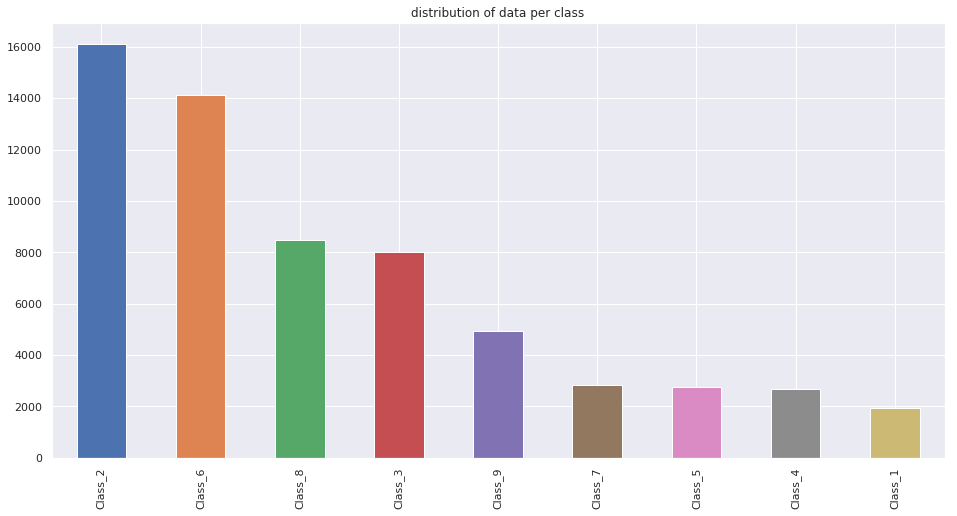

In [6]:
sns.set()
target.value_counts().plot(kind = "bar",figsize=(16,8),title="distribution of data per class")
plt.show()

In [7]:
df.isnull().values.any(), target.isnull().values.any()

(False, False)

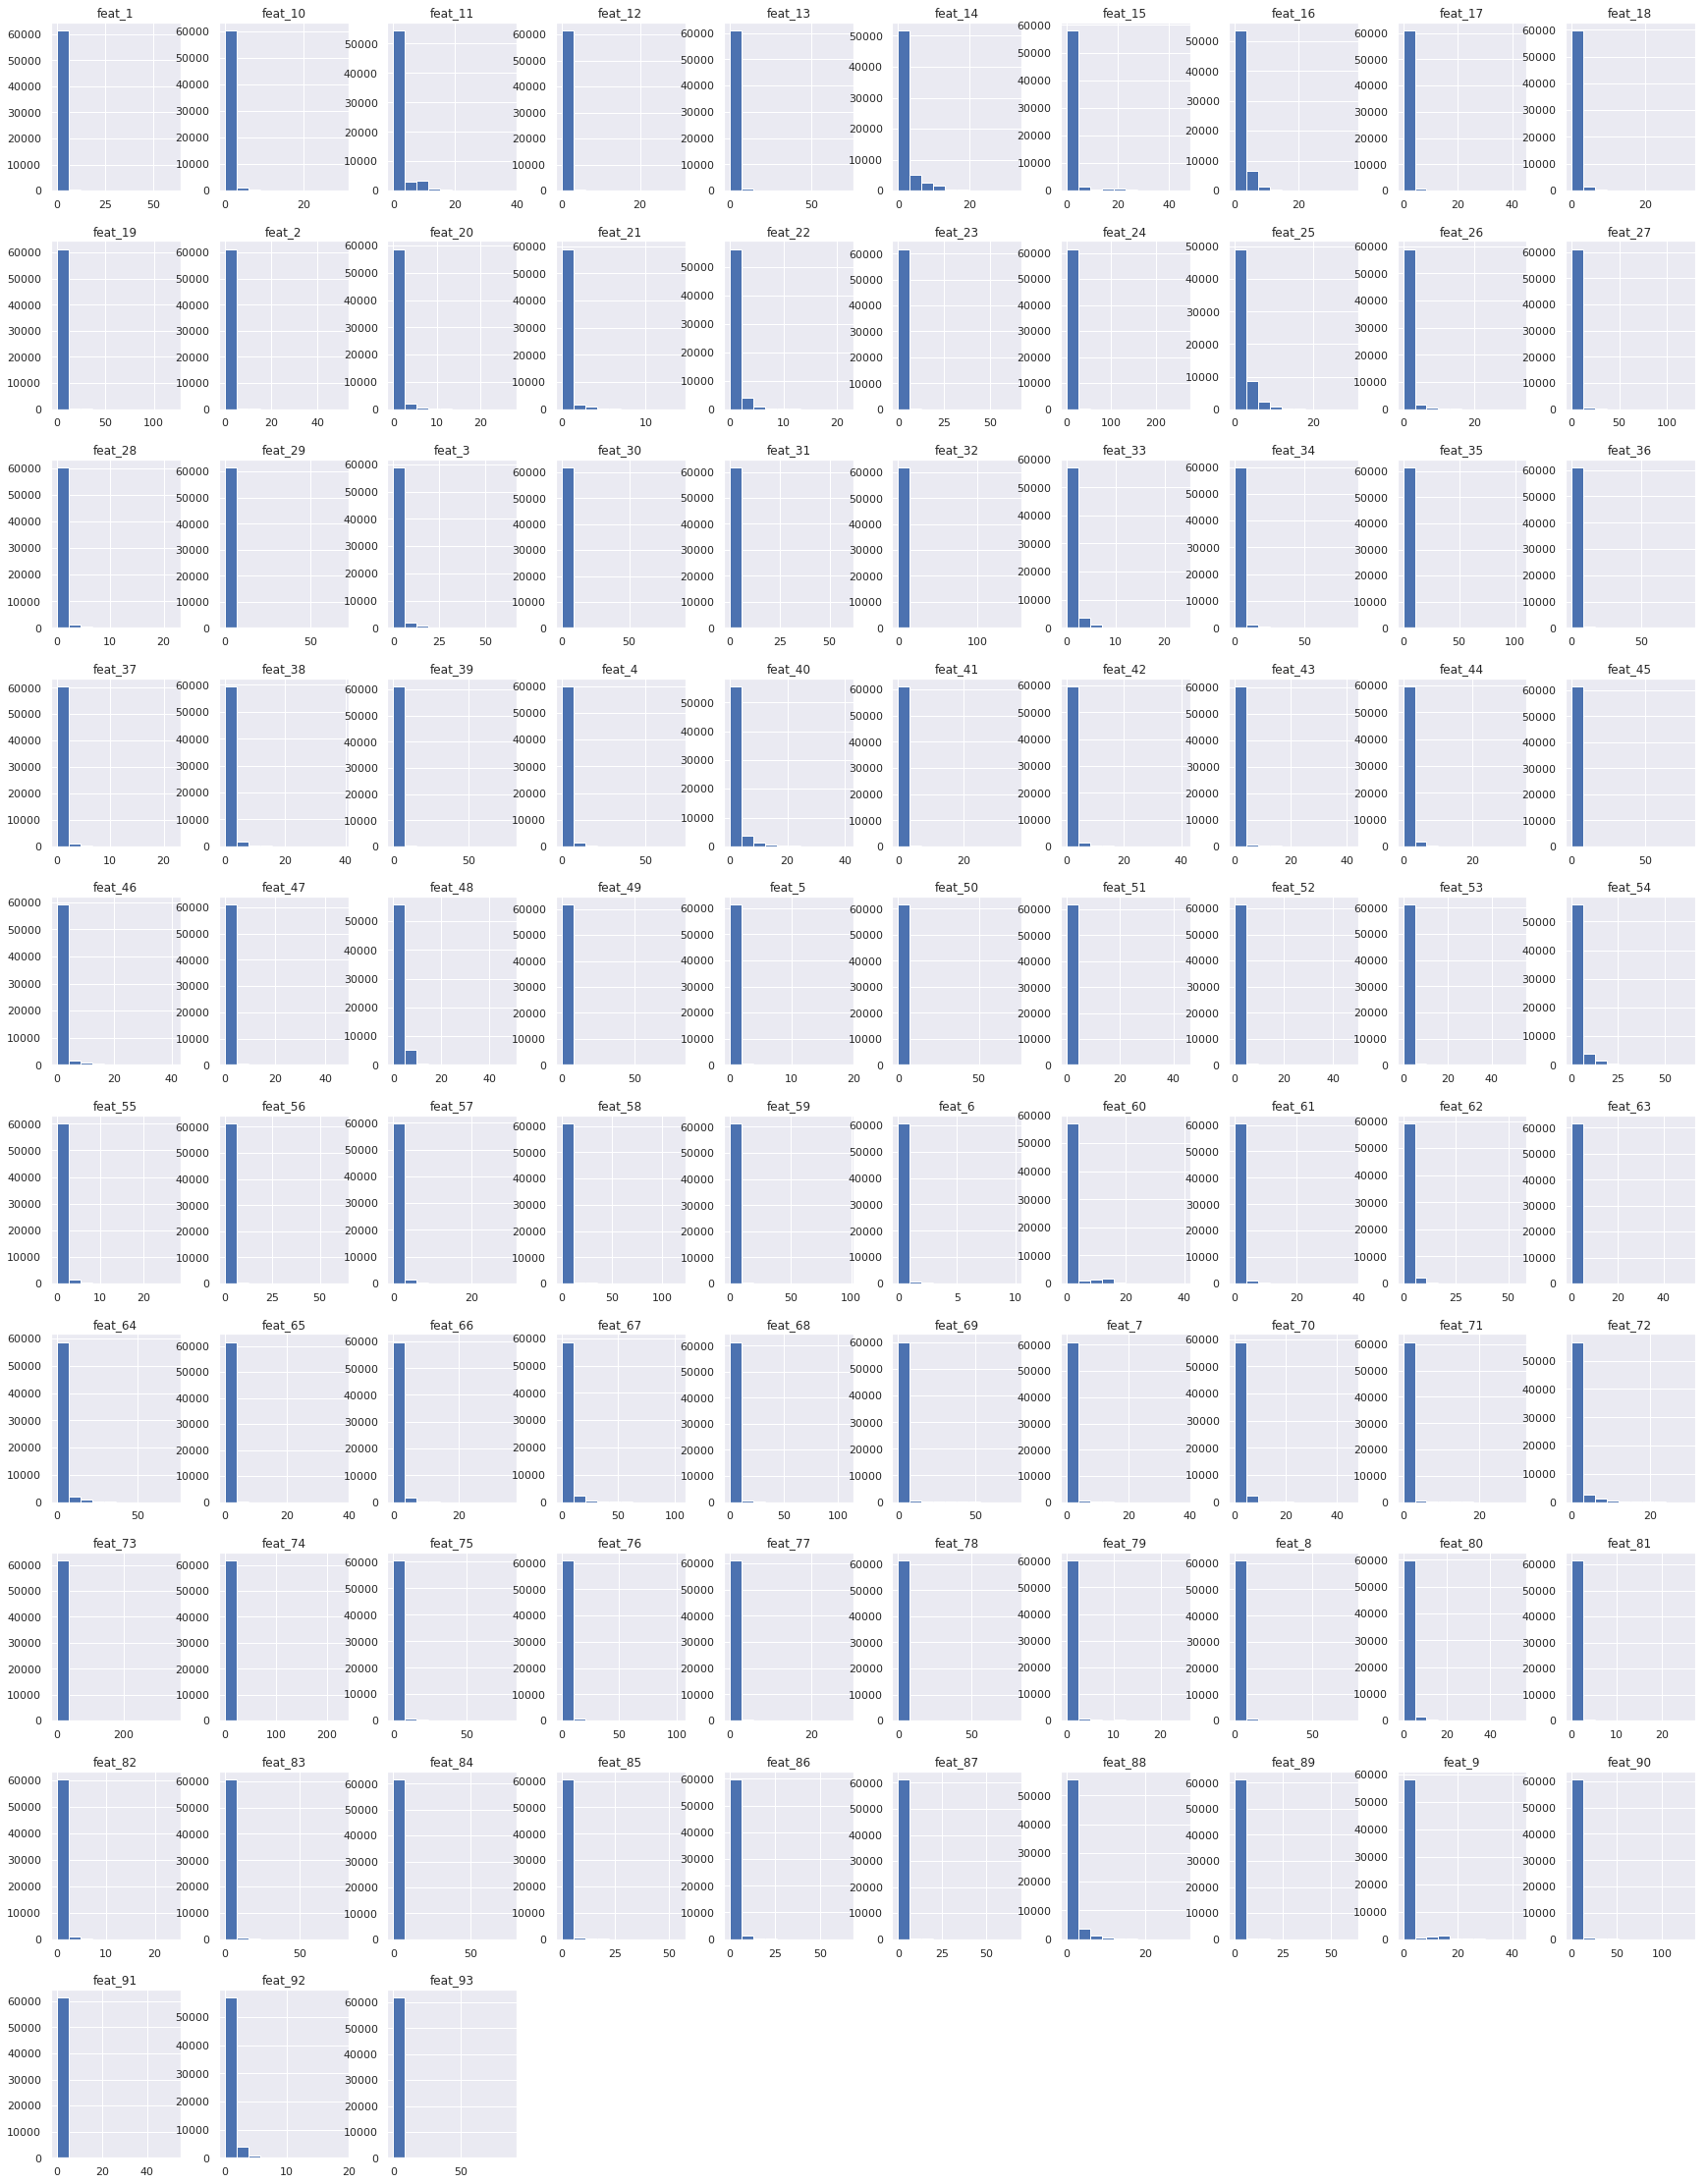

In [8]:
df.hist(figsize=(30,40))
plt.show()

In [24]:
non_zeros = []
for i in range(1,94):
    non_zeros.append(df["feat_"+str(i)][df["feat_"+str(i)] > 0].count()/df.shape[0])

In [25]:
print("non-zeros values represent only {}% of the dataset".format(np.mean(non_zeros)*100))

non-zeros values represent only 20.658340188654265% of the dataset


<div class="alert alert-info">
    <h2>Baseline results for several classifier</h2>
    </div>

In [8]:
# randomly split the data with respecting the classes distribution 

sss = StratifiedShuffleSplit(test_size = 0.25)

X = df.values
y = num_target.values

for train_index, test_index in sss.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

In [12]:
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial',max_iter = 1000)

lr.fit(X_train,y_train)

ypred = lr.predict_proba(X_test)

log_loss(y_test,ypred)

/home/infres/ihammoud/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.6400377421025827

In [13]:
xgb1 = xgb.XGBClassifier(booster="dart", n_jobs = 4,n_estimators=200,max_depth=15)

xgb1.fit(X_train, y_train)

ypred = xgb1.predict_proba(X_test)

log_loss(y_test,ypred)

0.4929971951560416

In [16]:
rf = RandomForestClassifier(n_estimators=200)

rf.fit(X_train,y_train)

ypred = rf.predict_proba(X_test)

log_loss(y_test,ypred)

0.5886034665632848

In [16]:
mlp = MLPClassifier(hidden_layer_sizes = (30,20,15),max_iter = 1000)

mlp.fit(X_train,y_train)

ypred = mlp.predict_proba(X_test)

log_loss(y_test,ypred)

0.5946496060429476

In [42]:
cat = CatBoostClassifier(loss_function='MultiClass',task_type = "GPU",devices = "2:3",max_depth = 15, verbose = False)

cat.fit(X_train, y_train)

ypred = cat.predict_proba(X_test)

log_loss(y_test,ypred)

0.5143845845461439

<div class="alert alert-info">
    <h2>Feature selection and missing values</h2>
    </div2>

## Keep only features having at least 5% non zeros data


In [26]:
relevant_feat = pd.DataFrame()

for i in np.where(np.array(non_zeros) >= 0.05)[0]:
    
    relevant_feat["feat_"+str(i+1)] = df["feat_"+str(i+1)]

In [27]:
X = relevant_feat.values

sss = StratifiedShuffleSplit(test_size = 0.25)

for train_index, test_index in sss.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


In [30]:
# to use XGBoost with gpu support, uncomment the lines below and add to the classifier's parameters **param
# param = {}
# param['gpu_id'] = 0
# param['max_bin'] = 16
# param['tree_method'] = 'gpu_hist'

clf = xgb.XGBClassifier(booster="dart",n_estimators=200,max_depth=15,n_jobs=4)

clf.fit(X_train, y_train)

ypred = clf.predict_proba(X_test)

log_loss(y_test,ypred)

0.4909867143039206

In [28]:
clf = RandomForestClassifier(n_estimators=200)

clf.fit(X_train, y_train)

ypred = clf.predict_proba(X_test)

log_loss(y_test,ypred)

0.5879855476759311

## Trying to impute zeros with basics methods

In [17]:
def replace_zeros(by="mean"):
    
    wo_zeros = pd.DataFrame()
    
    for feat in df.columns:
        
        if(by.lower() == "mean"):
            wo_zeros[feat] = df[feat].mask(df[feat] == 0, df[feat].values.mean())
            
        elif (by.lower() == "mean_non_zeros"):
            
            wo_zeros[feat] = df[feat].mask(df[feat] == 0, df[feat][df[feat] > 0].values.mean())
            
        elif (by.lower() == "median"):
            
            wo_zeros[feat] = df[feat].mask(df[feat] == 0, np.median(df[feat].values))
    
        elif (by.lower() == "median_non_zeros"):
            
            wo_zeros[feat] = df[feat].mask(df[feat] == 0, np.median(df[feat][df[feat] > 0].values))
        
        elif (by.lower() == "most_frequent"):
            
            wo_zeros[feat] = df[feat].mask(df[feat] == 0, Counter(df[feat].values).most_common()[1][0])
        
        else:
            print("option not found")
            return -1
       
    X = wo_zeros.values
    
    sss = StratifiedShuffleSplit(test_size = 0.25)

    for train_index, test_index in sss.split(X,y):
    
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
#   xgboost is very slow, I will replace it by RandomForest just for experiment

#     clf = xgb.XGBClassifier(booster="dart", n_jobs = 4,n_estimators=200,max_depth=15)
    
    clf = RandomForestClassifier(n_estimators=200)
    
    clf.fit(X_train, y_train)

    ypred = clf.predict_proba(X_test)

    return log_loss(y_test,ypred)
    

_replace with the mean_

In [14]:
replace_zeros()

0.591493647664192

_repalce with mean of non zero values_

In [15]:
replace_zeros("mean_non_zeros")

0.6274803484134965

_replace with median_

In [18]:
replace_zeros("median")

0.5883273206942061

_replace with median of non zero values_

In [20]:
replace_zeros("median_non_zeros")

0.6824097152942948

_replace with most frequent value after zero_

In [21]:
replace_zeros("most_frequent")

0.7182474160484905

___None of the above method give better result than with keeping zeros.___

## Estimating missing values using matrix factorization

In [29]:
model = NMF(n_components=20,init="nndsvda",solver="cd",max_iter=1000, random_state = 42,l1_ratio=0.1)


W = model.fit_transform(df.values)

H = model.components_

In [31]:
newX = W.dot(H)

In [32]:
sss = StratifiedShuffleSplit(test_size = 0.25)

y = num_target.values

for train_index, test_index in sss.split(newX,y):
    
    X_train, X_test = newX[train_index], newX[test_index]
    y_train, y_test = y[train_index], y[test_index]

# too slow
# clf = xgb.XGBClassifier(booster="dart", n_jobs = 4,n_estimators=200,max_depth=15)

clf = RandomForestClassifier(n_estimators=200)

clf.fit(X_train, y_train)

ypred = clf.predict_proba(X_test)

log_loss(y_test,ypred)

0.6586097761963999

___So this method doesn't not work___

## YCImpute, a library to impute missing values using different classifiers

In [33]:
from ycimpute.ycimpute.imputer.knnimput import KNN

In [34]:
newdf = df.replace(0,np.NaN)
m = KNN()

In [35]:
# very very slow
X = m.solve(newdf.values)

Imputing row 1/61878 with 70 missing, elapsed time: 5135.337
Imputing row 101/61878 with 67 missing, elapsed time: 5138.334
Imputing row 201/61878 with 58 missing, elapsed time: 5141.182
Imputing row 301/61878 with 80 missing, elapsed time: 5144.088
Imputing row 401/61878 with 67 missing, elapsed time: 5146.955
Imputing row 501/61878 with 85 missing, elapsed time: 5149.791
Imputing row 601/61878 with 44 missing, elapsed time: 5152.683
Imputing row 701/61878 with 73 missing, elapsed time: 5155.639
Imputing row 801/61878 with 66 missing, elapsed time: 5158.761
Imputing row 901/61878 with 80 missing, elapsed time: 5161.715
Imputing row 1001/61878 with 78 missing, elapsed time: 5164.597
Imputing row 1101/61878 with 75 missing, elapsed time: 5167.493
Imputing row 1201/61878 with 68 missing, elapsed time: 5170.591
Imputing row 1301/61878 with 81 missing, elapsed time: 5173.673
Imputing row 1401/61878 with 68 missing, elapsed time: 5176.704
Imputing row 1501/61878 with 67 missing, elapsed tim

Imputing row 12801/61878 with 72 missing, elapsed time: 5542.134
Imputing row 12901/61878 with 76 missing, elapsed time: 5545.292
Imputing row 13001/61878 with 83 missing, elapsed time: 5548.441
Imputing row 13101/61878 with 66 missing, elapsed time: 5551.547
Imputing row 13201/61878 with 70 missing, elapsed time: 5554.686
Imputing row 13301/61878 with 73 missing, elapsed time: 5557.807
Imputing row 13401/61878 with 71 missing, elapsed time: 5560.940
Imputing row 13501/61878 with 84 missing, elapsed time: 5564.066
Imputing row 13601/61878 with 79 missing, elapsed time: 5567.208
Imputing row 13701/61878 with 82 missing, elapsed time: 5570.397
Imputing row 13801/61878 with 86 missing, elapsed time: 5573.518
Imputing row 13901/61878 with 83 missing, elapsed time: 5576.651
Imputing row 14001/61878 with 69 missing, elapsed time: 5579.862
Imputing row 14101/61878 with 83 missing, elapsed time: 5582.962
Imputing row 14201/61878 with 81 missing, elapsed time: 5586.052
Imputing row 14301/61878 

Imputing row 25501/61878 with 85 missing, elapsed time: 5942.842
Imputing row 25601/61878 with 84 missing, elapsed time: 5945.947
Imputing row 25701/61878 with 67 missing, elapsed time: 5949.195
Imputing row 25801/61878 with 76 missing, elapsed time: 5952.282
Imputing row 25901/61878 with 74 missing, elapsed time: 5955.322
Imputing row 26001/61878 with 79 missing, elapsed time: 5958.369
Imputing row 26101/61878 with 70 missing, elapsed time: 5961.329
Imputing row 26201/61878 with 77 missing, elapsed time: 5964.306
Imputing row 26301/61878 with 71 missing, elapsed time: 5967.282
Imputing row 26401/61878 with 81 missing, elapsed time: 5970.368
Imputing row 26501/61878 with 82 missing, elapsed time: 5973.547
Imputing row 26601/61878 with 72 missing, elapsed time: 5976.678
Imputing row 26701/61878 with 74 missing, elapsed time: 5979.793
Imputing row 26801/61878 with 84 missing, elapsed time: 5982.906
Imputing row 26901/61878 with 85 missing, elapsed time: 5986.094
Imputing row 27001/61878 

Imputing row 38201/61878 with 72 missing, elapsed time: 6319.148
Imputing row 38301/61878 with 67 missing, elapsed time: 6321.796
Imputing row 38401/61878 with 70 missing, elapsed time: 6324.469
Imputing row 38501/61878 with 84 missing, elapsed time: 6327.136
Imputing row 38601/61878 with 60 missing, elapsed time: 6329.840
Imputing row 38701/61878 with 55 missing, elapsed time: 6332.570
Imputing row 38801/61878 with 82 missing, elapsed time: 6335.294
Imputing row 38901/61878 with 82 missing, elapsed time: 6337.959
Imputing row 39001/61878 with 69 missing, elapsed time: 6340.599
Imputing row 39101/61878 with 88 missing, elapsed time: 6343.284
Imputing row 39201/61878 with 67 missing, elapsed time: 6345.928
Imputing row 39301/61878 with 44 missing, elapsed time: 6348.577
Imputing row 39401/61878 with 69 missing, elapsed time: 6351.282
Imputing row 39501/61878 with 61 missing, elapsed time: 6354.011
Imputing row 39601/61878 with 64 missing, elapsed time: 6356.700
Imputing row 39701/61878 

Imputing row 50901/61878 with 63 missing, elapsed time: 6661.016
Imputing row 51001/61878 with 62 missing, elapsed time: 6663.677
Imputing row 51101/61878 with 64 missing, elapsed time: 6666.309
Imputing row 51201/61878 with 81 missing, elapsed time: 6668.822
Imputing row 51301/61878 with 54 missing, elapsed time: 6671.492
Imputing row 51401/61878 with 70 missing, elapsed time: 6674.188
Imputing row 51501/61878 with 43 missing, elapsed time: 6676.873
Imputing row 51601/61878 with 65 missing, elapsed time: 6679.594
Imputing row 51701/61878 with 65 missing, elapsed time: 6682.207
Imputing row 51801/61878 with 59 missing, elapsed time: 6684.861
Imputing row 51901/61878 with 74 missing, elapsed time: 6687.553
Imputing row 52001/61878 with 78 missing, elapsed time: 6690.192
Imputing row 52101/61878 with 70 missing, elapsed time: 6692.922
Imputing row 52201/61878 with 62 missing, elapsed time: 6695.607
Imputing row 52301/61878 with 61 missing, elapsed time: 6698.268
Imputing row 52401/61878 

In [37]:
sss = StratifiedShuffleSplit(test_size = 0.25)

y = num_target.values

for train_index, test_index in sss.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# clf = xgb.XGBClassifier(booster="dart", n_jobs = 4,n_estimators=200,max_depth=15)

clf = RandomForestClassifier(n_estimators=200)

clf.fit(X_train, y_train)

ypred = clf.predict_proba(X_test)

log_loss(y_test,ypred)

1.0611331685172247

___And clearly this doesn't work.___

## Voting classifier

In [39]:
X = df.values

sss = StratifiedShuffleSplit(test_size = 0.25)

y = num_target.values

for train_index, test_index in sss.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [12]:
# to use xgboost with gpu
# param = {}
# param['gpu_id'] = 0
# param['max_bin'] = 16
# param['tree_method'] = 'gpu_exact'
# param['updater'] = 'grow_gpu'

In [40]:
# this can take a lot of time, about one hour or more

xgb1 = xgb.XGBClassifier(booster="dart",n_estimators=200,max_depth = 15,n_jobs=4)

cat = CatBoostClassifier(loss_function='MultiClass',task_type = "GPU", devices = "2:3", max_depth = 15,verbose = False)

voting = VotingClassifier(estimators=[('cat', cat), ('xgb', xgb1)], voting='soft')

voting.fit(X_train,y_train)

ypred = voting.predict_proba(X_test)

log_loss(y_test,ypred)

0.47855300091290626

# Submission on Kaggle leaderboard

In [3]:
df = pd.read_csv("train.csv")
df1 = pd.read_csv("test.csv")

In [5]:
if("id" in df.columns and "target" in df.columns):
    
    ids = df.id
    target = df.target
    num_target = df["target"].astype('category').cat.codes
    df.drop(["id","target"],axis=1,inplace=True)

if("id" in df1.columns):
    ids1 = df1.id
    df1.drop(["id"],axis=1,inplace=True)

In [9]:
X_train = df.values

y_train = num_target.values

X_test = df1.values

X_train.shape,y_train.shape,X_test.shape

((61878, 93), (61878,), (144368, 93))

In [10]:
# if you run it on cpu machine, eliminate task_type and devices parameters
cat = CatBoostClassifier(loss_function='MultiClass',task_type = "GPU", devices = "2:3", max_depth = 15,verbose = False)

xgb1 = xgb.XGBClassifier(booster="dart",n_estimators=200,max_depth = 15,n_jobs=4)

voting = VotingClassifier(estimators=[('cat', cat), ('xgb', xgb1)], voting='soft')

voting.fit(X_train,y_train)

ypred = voting.predict_proba(X_test)

0:	learn: -2.1056619	total: 1.64s	remaining: 27m 17s
1:	learn: -2.0224631	total: 3.04s	remaining: 25m 16s
2:	learn: -1.9530811	total: 4.43s	remaining: 24m 32s
3:	learn: -1.8942900	total: 5.88s	remaining: 24m 24s
4:	learn: -1.8347732	total: 7.24s	remaining: 24m 1s
5:	learn: -1.7817149	total: 8.59s	remaining: 23m 43s
6:	learn: -1.7358773	total: 10s	remaining: 23m 39s
7:	learn: -1.6921486	total: 11.4s	remaining: 23m 28s
8:	learn: -1.6535332	total: 12.8s	remaining: 23m 26s
9:	learn: -1.6137526	total: 14.1s	remaining: 23m 20s
10:	learn: -1.5775677	total: 15.6s	remaining: 23m 19s
11:	learn: -1.5420934	total: 16.8s	remaining: 23m 5s
12:	learn: -1.5096262	total: 18.2s	remaining: 22m 58s
13:	learn: -1.4810589	total: 19.6s	remaining: 23m 1s
14:	learn: -1.4528763	total: 21.1s	remaining: 23m 3s
15:	learn: -1.4256890	total: 22.4s	remaining: 22m 58s
16:	learn: -1.3994510	total: 23.8s	remaining: 22m 54s
17:	learn: -1.3749322	total: 25.1s	remaining: 22m 50s
18:	learn: -1.3515480	total: 26.4s	remaining

151:	learn: -0.6167719	total: 3m 24s	remaining: 19m 3s
152:	learn: -0.6153359	total: 3m 26s	remaining: 19m 2s
153:	learn: -0.6139226	total: 3m 27s	remaining: 19m
154:	learn: -0.6128100	total: 3m 28s	remaining: 18m 58s
155:	learn: -0.6112040	total: 3m 30s	remaining: 18m 57s
156:	learn: -0.6095437	total: 3m 31s	remaining: 18m 55s
157:	learn: -0.6081814	total: 3m 32s	remaining: 18m 54s
158:	learn: -0.6064070	total: 3m 34s	remaining: 18m 54s
159:	learn: -0.6050765	total: 3m 35s	remaining: 18m 52s
160:	learn: -0.6037053	total: 3m 37s	remaining: 18m 51s
161:	learn: -0.6021814	total: 3m 38s	remaining: 18m 50s
162:	learn: -0.6004899	total: 3m 39s	remaining: 18m 49s
163:	learn: -0.5989802	total: 3m 41s	remaining: 18m 47s
164:	learn: -0.5977323	total: 3m 42s	remaining: 18m 45s
165:	learn: -0.5964133	total: 3m 43s	remaining: 18m 43s
166:	learn: -0.5951338	total: 3m 44s	remaining: 18m 42s
167:	learn: -0.5940885	total: 3m 46s	remaining: 18m 40s
168:	learn: -0.5928364	total: 3m 47s	remaining: 18m 38

299:	learn: -0.4642337	total: 6m 46s	remaining: 15m 47s
300:	learn: -0.4635043	total: 6m 47s	remaining: 15m 46s
301:	learn: -0.4630495	total: 6m 48s	remaining: 15m 44s
302:	learn: -0.4622225	total: 6m 50s	remaining: 15m 43s
303:	learn: -0.4611888	total: 6m 51s	remaining: 15m 42s
304:	learn: -0.4602269	total: 6m 53s	remaining: 15m 41s
305:	learn: -0.4596465	total: 6m 54s	remaining: 15m 39s
306:	learn: -0.4587469	total: 6m 55s	remaining: 15m 38s
307:	learn: -0.4577125	total: 6m 57s	remaining: 15m 37s
308:	learn: -0.4572138	total: 6m 58s	remaining: 15m 36s
309:	learn: -0.4565259	total: 7m	remaining: 15m 35s
310:	learn: -0.4559733	total: 7m 1s	remaining: 15m 33s
311:	learn: -0.4551016	total: 7m 3s	remaining: 15m 32s
312:	learn: -0.4545718	total: 7m 4s	remaining: 15m 31s
313:	learn: -0.4540951	total: 7m 5s	remaining: 15m 30s
314:	learn: -0.4534275	total: 7m 7s	remaining: 15m 28s
315:	learn: -0.4526674	total: 7m 8s	remaining: 15m 27s
316:	learn: -0.4519972	total: 7m 9s	remaining: 15m 26s
317

447:	learn: -0.3713874	total: 10m 15s	remaining: 12m 37s
448:	learn: -0.3708885	total: 10m 16s	remaining: 12m 36s
449:	learn: -0.3705237	total: 10m 17s	remaining: 12m 34s
450:	learn: -0.3700517	total: 10m 19s	remaining: 12m 33s
451:	learn: -0.3693984	total: 10m 20s	remaining: 12m 32s
452:	learn: -0.3690174	total: 10m 21s	remaining: 12m 31s
453:	learn: -0.3684509	total: 10m 23s	remaining: 12m 29s
454:	learn: -0.3681525	total: 10m 24s	remaining: 12m 28s
455:	learn: -0.3675670	total: 10m 26s	remaining: 12m 26s
456:	learn: -0.3672070	total: 10m 27s	remaining: 12m 25s
457:	learn: -0.3667943	total: 10m 28s	remaining: 12m 24s
458:	learn: -0.3663242	total: 10m 30s	remaining: 12m 22s
459:	learn: -0.3659478	total: 10m 31s	remaining: 12m 21s
460:	learn: -0.3655671	total: 10m 32s	remaining: 12m 20s
461:	learn: -0.3651871	total: 10m 34s	remaining: 12m 18s
462:	learn: -0.3647242	total: 10m 35s	remaining: 12m 17s
463:	learn: -0.3643062	total: 10m 37s	remaining: 12m 16s
464:	learn: -0.3636682	total: 1

593:	learn: -0.3069061	total: 13m 45s	remaining: 9m 24s
594:	learn: -0.3065981	total: 13m 47s	remaining: 9m 23s
595:	learn: -0.3063831	total: 13m 48s	remaining: 9m 21s
596:	learn: -0.3060263	total: 13m 49s	remaining: 9m 20s
597:	learn: -0.3056946	total: 13m 51s	remaining: 9m 18s
598:	learn: -0.3052288	total: 13m 52s	remaining: 9m 17s
599:	learn: -0.3048540	total: 13m 54s	remaining: 9m 16s
600:	learn: -0.3043984	total: 13m 55s	remaining: 9m 15s
601:	learn: -0.3038138	total: 13m 57s	remaining: 9m 13s
602:	learn: -0.3034645	total: 13m 59s	remaining: 9m 12s
603:	learn: -0.3029997	total: 14m	remaining: 9m 11s
604:	learn: -0.3026141	total: 14m 2s	remaining: 9m 9s
605:	learn: -0.3021289	total: 14m 3s	remaining: 9m 8s
606:	learn: -0.3018059	total: 14m 5s	remaining: 9m 7s
607:	learn: -0.3015104	total: 14m 6s	remaining: 9m 5s
608:	learn: -0.3012452	total: 14m 7s	remaining: 9m 4s
609:	learn: -0.3008366	total: 14m 9s	remaining: 9m 3s
610:	learn: -0.3005328	total: 14m 10s	remaining: 9m 1s
611:	lear

741:	learn: -0.2593106	total: 17m 19s	remaining: 6m 1s
742:	learn: -0.2590934	total: 17m 20s	remaining: 5m 59s
743:	learn: -0.2587797	total: 17m 21s	remaining: 5m 58s
744:	learn: -0.2585206	total: 17m 23s	remaining: 5m 57s
745:	learn: -0.2582136	total: 17m 24s	remaining: 5m 55s
746:	learn: -0.2579368	total: 17m 26s	remaining: 5m 54s
747:	learn: -0.2577208	total: 17m 27s	remaining: 5m 52s
748:	learn: -0.2573880	total: 17m 28s	remaining: 5m 51s
749:	learn: -0.2571143	total: 17m 30s	remaining: 5m 50s
750:	learn: -0.2569544	total: 17m 31s	remaining: 5m 48s
751:	learn: -0.2564845	total: 17m 33s	remaining: 5m 47s
752:	learn: -0.2562203	total: 17m 34s	remaining: 5m 45s
753:	learn: -0.2560039	total: 17m 36s	remaining: 5m 44s
754:	learn: -0.2558413	total: 17m 37s	remaining: 5m 43s
755:	learn: -0.2555853	total: 17m 38s	remaining: 5m 41s
756:	learn: -0.2553025	total: 17m 40s	remaining: 5m 40s
757:	learn: -0.2550340	total: 17m 41s	remaining: 5m 38s
758:	learn: -0.2548424	total: 17m 43s	remaining: 

889:	learn: -0.2221093	total: 20m 55s	remaining: 2m 35s
890:	learn: -0.2219024	total: 20m 56s	remaining: 2m 33s
891:	learn: -0.2216141	total: 20m 58s	remaining: 2m 32s
892:	learn: -0.2214454	total: 20m 59s	remaining: 2m 30s
893:	learn: -0.2212004	total: 21m 1s	remaining: 2m 29s
894:	learn: -0.2209950	total: 21m 2s	remaining: 2m 28s
895:	learn: -0.2207217	total: 21m 3s	remaining: 2m 26s
896:	learn: -0.2204897	total: 21m 5s	remaining: 2m 25s
897:	learn: -0.2203929	total: 21m 6s	remaining: 2m 23s
898:	learn: -0.2200964	total: 21m 8s	remaining: 2m 22s
899:	learn: -0.2198860	total: 21m 9s	remaining: 2m 21s
900:	learn: -0.2197167	total: 21m 11s	remaining: 2m 19s
901:	learn: -0.2195417	total: 21m 12s	remaining: 2m 18s
902:	learn: -0.2192868	total: 21m 13s	remaining: 2m 16s
903:	learn: -0.2190450	total: 21m 15s	remaining: 2m 15s
904:	learn: -0.2188624	total: 21m 16s	remaining: 2m 14s
905:	learn: -0.2185518	total: 21m 18s	remaining: 2m 12s
906:	learn: -0.2182674	total: 21m 19s	remaining: 2m 11s

[11:11:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 800 extra nodes, 0 pruned nodes, max_depth=15
[11:11:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 672 extra nodes, 0 pruned nodes, max_depth=15
[11:11:50] /workspace/src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[11:11:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 926 extra nodes, 0 pruned nodes, max_depth=15
[11:11:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1996 extra nodes, 0 pruned nodes, max_depth=15
[11:11:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2458 extra nodes, 0 pruned nodes, max_depth=15
[11:11:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1610 extra nodes, 0 pruned nodes, max_depth=15
[11:11:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=15
[11:12:00] /workspace/src/tree/updater_prune.cc:74: 

[11:13:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1200 extra nodes, 0 pruned nodes, max_depth=15
[11:13:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1098 extra nodes, 0 pruned nodes, max_depth=15
[11:13:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 932 extra nodes, 0 pruned nodes, max_depth=15
[11:13:38] /workspace/src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[11:13:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1070 extra nodes, 0 pruned nodes, max_depth=15
[11:13:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1482 extra nodes, 0 pruned nodes, max_depth=15
[11:13:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2100 extra nodes, 0 pruned nodes, max_depth=15
[11:13:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1712 extra nodes, 0 pruned nodes, max_depth=15
[11:13:47] /workspace/src/tree/updater_prune.cc:7

[11:15:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1272 extra nodes, 0 pruned nodes, max_depth=15
[11:15:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1318 extra nodes, 0 pruned nodes, max_depth=15
[11:15:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1362 extra nodes, 0 pruned nodes, max_depth=15
[11:15:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1142 extra nodes, 0 pruned nodes, max_depth=15
[11:15:34] /workspace/src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[11:15:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1060 extra nodes, 0 pruned nodes, max_depth=15
[11:15:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1808 extra nodes, 0 pruned nodes, max_depth=15
[11:15:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1506 extra nodes, 0 pruned nodes, max_depth=15
[11:15:42] /workspace/src/tree/updater_prune.cc:

[11:17:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 258 extra nodes, 0 pruned nodes, max_depth=15
[11:17:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1264 extra nodes, 0 pruned nodes, max_depth=15
[11:17:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1310 extra nodes, 0 pruned nodes, max_depth=15
[11:17:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1286 extra nodes, 0 pruned nodes, max_depth=15
[11:17:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1086 extra nodes, 0 pruned nodes, max_depth=15
[11:17:27] /workspace/src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[11:17:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 896 extra nodes, 0 pruned nodes, max_depth=15
[11:17:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1572 extra nodes, 0 pruned nodes, max_depth=15
[11:17:32] /workspace/src/tree/updater_prune.cc:74

[11:19:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1208 extra nodes, 0 pruned nodes, max_depth=15
[11:19:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 210 extra nodes, 0 pruned nodes, max_depth=15
[11:19:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 960 extra nodes, 0 pruned nodes, max_depth=15
[11:19:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1202 extra nodes, 0 pruned nodes, max_depth=15
[11:19:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1128 extra nodes, 0 pruned nodes, max_depth=15
[11:19:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1050 extra nodes, 0 pruned nodes, max_depth=15
[11:19:14] /workspace/src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[11:19:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1064 extra nodes, 0 pruned nodes, max_depth=15
[11:19:19] /workspace/src/tree/updater_prune.cc:74

[11:20:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 750 extra nodes, 0 pruned nodes, max_depth=15
[11:20:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 864 extra nodes, 0 pruned nodes, max_depth=15
[11:20:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=15
[11:20:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1088 extra nodes, 0 pruned nodes, max_depth=15
[11:20:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 836 extra nodes, 0 pruned nodes, max_depth=15
[11:20:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1006 extra nodes, 0 pruned nodes, max_depth=15
[11:20:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1120 extra nodes, 0 pruned nodes, max_depth=15
[11:20:53] /workspace/src/gbm/gbtree.cc:494: drop 0 trees, weight = 1
[11:20:55] /workspace/src/tree/updater_prune.cc:74: 

[11:22:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 848 extra nodes, 0 pruned nodes, max_depth=15
[11:22:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 854 extra nodes, 0 pruned nodes, max_depth=15
[11:22:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 830 extra nodes, 0 pruned nodes, max_depth=15
[11:22:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 262 extra nodes, 0 pruned nodes, max_depth=15
[11:22:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 952 extra nodes, 0 pruned nodes, max_depth=15
[11:22:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 920 extra nodes, 0 pruned nodes, max_depth=15
[11:22:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 710 extra nodes, 0 pruned nodes, max_depth=15
[11:22:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 818 extra nodes, 0 pruned nodes, max_depth=15


[11:23:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 550 extra nodes, 0 pruned nodes, max_depth=15
[11:23:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 662 extra nodes, 0 pruned nodes, max_depth=15
[11:23:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 678 extra nodes, 0 pruned nodes, max_depth=15
[11:23:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 720 extra nodes, 0 pruned nodes, max_depth=15
[11:23:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes, 0 pruned nodes, max_depth=15
[11:23:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 712 extra nodes, 0 pruned nodes, max_depth=15
[11:23:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 564 extra nodes, 0 pruned nodes, max_depth=15
[11:23:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 516 extra nodes, 0 pruned nodes, max_depth=15


[11:24:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 532 extra nodes, 0 pruned nodes, max_depth=15
[11:24:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1028 extra nodes, 0 pruned nodes, max_depth=15
[11:24:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 728 extra nodes, 0 pruned nodes, max_depth=15
[11:24:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=15
[11:24:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=15
[11:24:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 582 extra nodes, 0 pruned nodes, max_depth=15
[11:24:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=15
[11:24:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=15

[11:25:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=15
[11:26:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=15
[11:26:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=15
[11:26:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 0 pruned nodes, max_depth=15
[11:26:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=15
[11:26:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 564 extra nodes, 0 pruned nodes, max_depth=15
[11:26:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes, 0 pruned nodes, max_depth=15
[11:26:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=15


[11:27:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=15
[11:27:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 710 extra nodes, 0 pruned nodes, max_depth=15
[11:27:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=15
[11:27:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 292 extra nodes, 0 pruned nodes, max_depth=15
[11:27:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 206 extra nodes, 0 pruned nodes, max_depth=15
[11:27:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=15
[11:27:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 712 extra nodes, 0 pruned nodes, max_depth=15
[11:27:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 324 extra nodes, 0 pruned nodes, max_depth=15


[11:28:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 328 extra nodes, 0 pruned nodes, max_depth=15
[11:28:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 790 extra nodes, 0 pruned nodes, max_depth=15
[11:28:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=15
[11:28:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 630 extra nodes, 0 pruned nodes, max_depth=15
[11:28:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=15
[11:28:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 232 extra nodes, 0 pruned nodes, max_depth=15
[11:28:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=15
[11:28:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes, 0 pruned nodes, max_depth=15


[11:29:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 310 extra nodes, 0 pruned nodes, max_depth=15
[11:29:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=15
[11:29:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=15
[11:29:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 0 pruned nodes, max_depth=15
[11:29:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=15
[11:29:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=15
[11:29:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 330 extra nodes, 0 pruned nodes, max_depth=15
[11:29:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=15


[11:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=15
[11:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 652 extra nodes, 0 pruned nodes, max_depth=15
[11:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 904 extra nodes, 0 pruned nodes, max_depth=15
[11:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=15
[11:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=15
[11:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 530 extra nodes, 0 pruned nodes, max_depth=15
[11:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=15
[11:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 282 extra nodes, 0 pruned nodes, max_depth=15


[11:31:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 302 extra nodes, 0 pruned nodes, max_depth=15
[11:31:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 608 extra nodes, 0 pruned nodes, max_depth=15
[11:31:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 882 extra nodes, 0 pruned nodes, max_depth=15
[11:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 706 extra nodes, 0 pruned nodes, max_depth=15
[11:31:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=15
[11:31:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=15
[11:31:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=15
[11:31:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=15


[11:32:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 294 extra nodes, 0 pruned nodes, max_depth=15
[11:32:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 576 extra nodes, 0 pruned nodes, max_depth=15
[11:32:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 0 pruned nodes, max_depth=15
[11:32:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=15
[11:32:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=15
[11:32:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=15
[11:32:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=15
[11:32:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 248 extra nodes, 0 pruned nodes, max_depth=15


[11:33:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=15
[11:33:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=15
[11:33:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 674 extra nodes, 0 pruned nodes, max_depth=15
[11:33:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 0 pruned nodes, max_depth=15
[11:33:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=15
[11:33:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 302 extra nodes, 0 pruned nodes, max_depth=15
[11:33:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=15
[11:33:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 0 pruned nodes, max_depth=15
[

[11:34:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 174 extra nodes, 0 pruned nodes, max_depth=15
[11:34:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 636 extra nodes, 0 pruned nodes, max_depth=15
[11:34:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 764 extra nodes, 0 pruned nodes, max_depth=15
[11:34:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=15
[11:34:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=15
[11:34:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=15
[11:34:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 348 extra nodes, 0 pruned nodes, max_depth=15
[11:34:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=15
[

[11:35:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=15
[11:35:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 796 extra nodes, 0 pruned nodes, max_depth=15
[11:35:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 670 extra nodes, 0 pruned nodes, max_depth=15
[11:35:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 280 extra nodes, 0 pruned nodes, max_depth=15
[11:35:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=15
[11:35:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=15
[11:35:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 316 extra nodes, 0 pruned nodes, max_depth=15
[11:35:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 206 extra nodes, 0 pruned nodes, max_depth=15
[

[11:36:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 340 extra nodes, 0 pruned nodes, max_depth=15
[11:36:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=15
[11:36:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 818 extra nodes, 0 pruned nodes, max_depth=15
[11:36:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 224 extra nodes, 0 pruned nodes, max_depth=15
[11:36:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=15
[11:36:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=15
[11:36:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=15
[11:36:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 0 pruned nodes, max_depth=15
[

[11:37:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 232 extra nodes, 0 pruned nodes, max_depth=15
[11:37:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=15
[11:37:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 0 pruned nodes, max_depth=15
[11:37:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=15
[11:37:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=15
[11:37:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 550 extra nodes, 0 pruned nodes, max_depth=15
[11:37:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=15
[11:37:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 0 pruned nodes, max_depth=15
[

[11:38:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 pruned nodes, max_depth=15
[11:38:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 558 extra nodes, 0 pruned nodes, max_depth=15
[11:38:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 880 extra nodes, 0 pruned nodes, max_depth=15
[11:38:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=15
[11:38:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=15
[11:38:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=15
[11:38:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 246 extra nodes, 0 pruned nodes, max_depth=15
[11:38:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=15
[

[11:39:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 622 extra nodes, 0 pruned nodes, max_depth=15
[11:39:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 640 extra nodes, 0 pruned nodes, max_depth=15
[11:39:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1026 extra nodes, 0 pruned nodes, max_depth=15
[11:39:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=15
[11:39:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=15
[11:39:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 282 extra nodes, 0 pruned nodes, max_depth=15
[11:39:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=15
[11:39:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 0 pruned nodes, max_depth=15


[11:40:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 0 pruned nodes, max_depth=15
[11:40:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 282 extra nodes, 0 pruned nodes, max_depth=15
[11:40:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1234 extra nodes, 0 pruned nodes, max_depth=15
[11:40:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 258 extra nodes, 0 pruned nodes, max_depth=15
[11:40:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=15
[11:40:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 326 extra nodes, 0 pruned nodes, max_depth=15
[11:40:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 0 pruned nodes, max_depth=15
[11:40:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 206 extra nodes, 0 pruned nodes, max_depth=15


[11:41:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=15
[11:41:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=15
[11:41:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1330 extra nodes, 0 pruned nodes, max_depth=15
[11:41:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 278 extra nodes, 0 pruned nodes, max_depth=15
[11:41:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=15
[11:41:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=15
[11:41:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 0 pruned nodes, max_depth=15
[11:41:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=15


[11:42:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=15
[11:42:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 258 extra nodes, 0 pruned nodes, max_depth=15
[11:42:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1418 extra nodes, 0 pruned nodes, max_depth=15
[11:42:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 572 extra nodes, 0 pruned nodes, max_depth=15
[11:42:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=15
[11:42:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 0 pruned nodes, max_depth=15
[11:42:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 272 extra nodes, 0 pruned nodes, max_depth=15
[11:42:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 270 extra nodes, 0 pruned nodes, max_depth=15


[11:43:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=15
[11:43:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1844 extra nodes, 0 pruned nodes, max_depth=15
[11:43:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 792 extra nodes, 0 pruned nodes, max_depth=15
[11:43:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 282 extra nodes, 0 pruned nodes, max_depth=15
[11:43:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=15
[11:43:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 0 pruned nodes, max_depth=15
[11:43:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=15
[11:43:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=15


[11:44:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=15
[11:44:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 582 extra nodes, 0 pruned nodes, max_depth=15
[11:44:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 770 extra nodes, 0 pruned nodes, max_depth=15
[11:44:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 202 extra nodes, 0 pruned nodes, max_depth=15
[11:44:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=15
[11:44:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=15
[11:44:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=15
[11:44:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 330 extra nodes, 0 pruned nodes, max_depth=15
[

[11:45:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 222 extra nodes, 0 pruned nodes, max_depth=15
[11:45:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 308 extra nodes, 0 pruned nodes, max_depth=15
[11:45:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1424 extra nodes, 0 pruned nodes, max_depth=15
[11:45:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=15
[11:45:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=15
[11:45:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 284 extra nodes, 0 pruned nodes, max_depth=15
[11:45:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 pruned nodes, max_depth=15
[11:45:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 210 extra nodes, 0 pruned nodes, max_depth=15


In [53]:
sub = pd.DataFrame()

sub["id"] = ids1

for i in range(9):
    sub["class_"+str(i+1)] = ypred[:,i]

In [54]:
sub.to_csv("submission.csv", index=False)